In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [5]:
dataset = pd.read_csv('../csv/INFY.BO.csv',index_col="Date",parse_dates=True)


In [6]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-25,705.000000,705.400024,693.049988,699.599976,699.599976,633979
2020-06-26,706.900024,750.900024,706.900024,748.150024,748.150024,821530
2020-06-29,738.750000,744.549988,730.000000,731.450012,731.450012,327676
2020-06-30,734.400024,739.000000,724.500000,735.900024,735.900024,203743
2020-07-01,736.000000,742.049988,730.000000,732.500000,732.500000,363835


In [7]:
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [8]:
dataset.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
DatetimeIndex: 66 entries, 2020-06-25 to 2020-09-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       66 non-null     float64
 1   High       66 non-null     float64
 2   Low        66 non-null     float64
 3   Close      66 non-null     float64
 4   Adj Close  66 non-null     float64
 5   Volume     66 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.6 KB


&lt;AxesSubplot:xlabel=&#39;Date&#39;&gt;

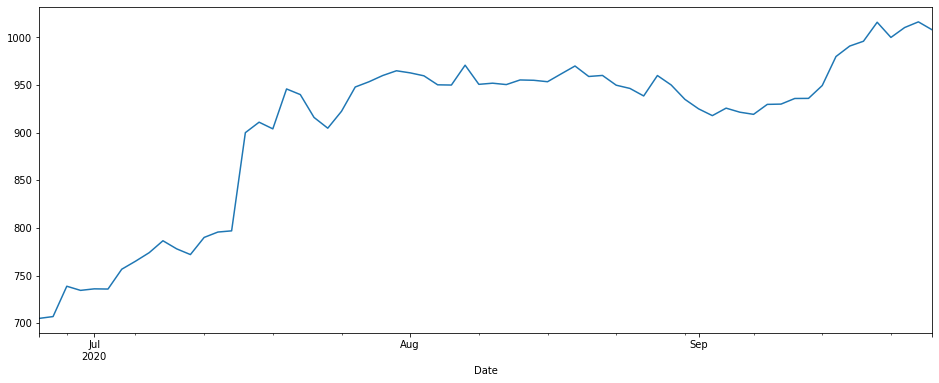

In [9]:
dataset['Open'].plot(figsize=(16,6))

In [10]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)


AttributeError: Can only use .str accessor with string values!

In [11]:
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [12]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-25,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-26,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-03,730.492859,744.399998,724.685713,738.071429,738.071429,4.339617e+05
2020-07-06,739.064287,754.328570,734.535714,747.235718,747.235718,4.064613e+05
2020-07-07,748.649998,760.864284,743.021423,753.842861,753.842861,3.697807e+05


&lt;AxesSubplot:xlabel=&#39;Date&#39;&gt;

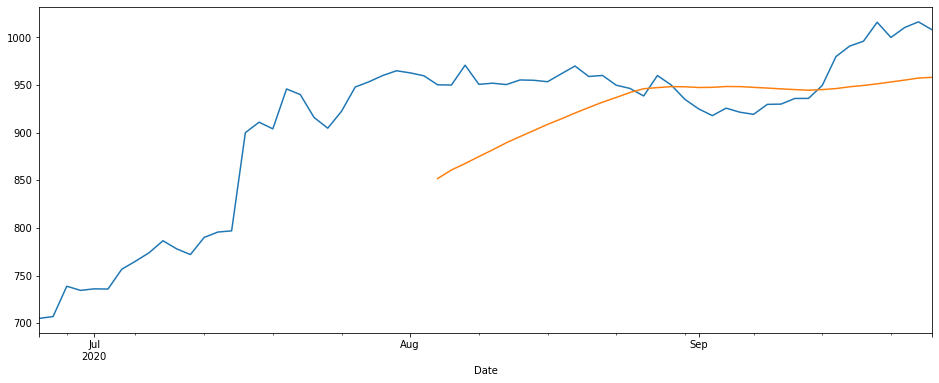

In [13]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

&lt;AxesSubplot:xlabel=&#39;Date&#39;&gt;

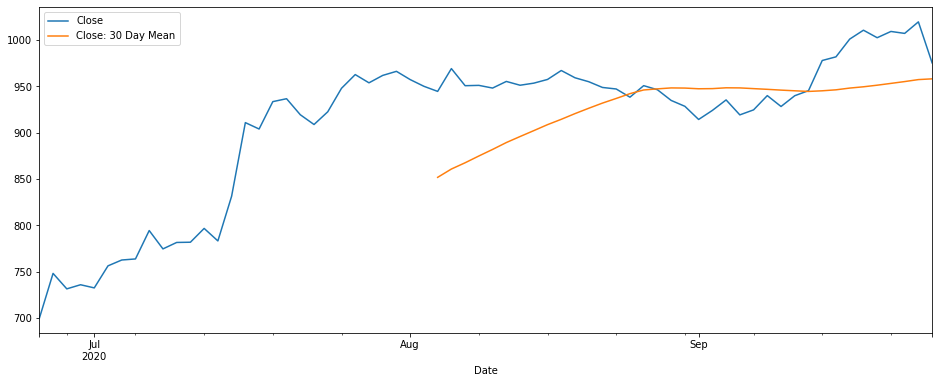

In [14]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

&lt;AxesSubplot:xlabel=&#39;Date&#39;&gt;

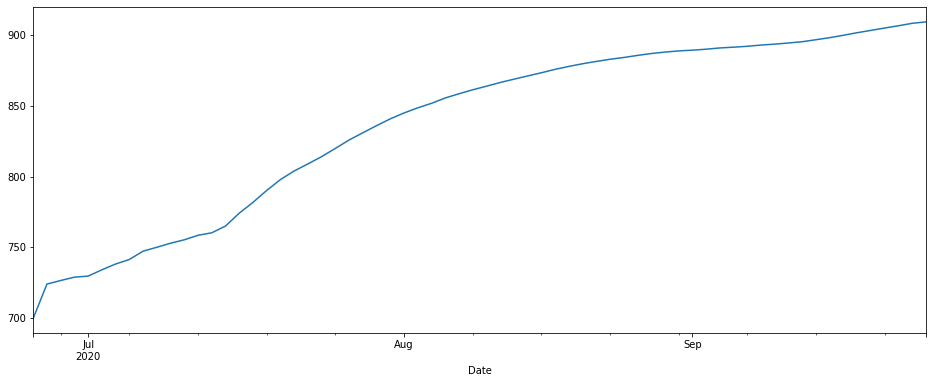

In [15]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [16]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(20, 40):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [20]:
# Initialising the RNN
regressor = Sequential()



In [24]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



ValueError: slice index 0 of dimension 0 out of bounds. for &#39;lstm_4/strided_slice_13&#39; (op: &#39;StridedSlice&#39;) with input shapes: [0,?,1], [1], [1], [1] and with computed input tensors: input[1] = &lt;0&gt;, input[2] = &lt;1&gt;, input[3] = &lt;1&gt;.

In [75]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0519
Epoch 2/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0052
Epoch 8/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step -

In [87]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('../csv/INFY.BO.csv',index_col="Date",parse_dates=True)



In [88]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [89]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [90]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null object
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [91]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [92]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [93]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
Open    20 non-null float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [95]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [96]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
0    20 non-null float32
dtypes: float32(1)
memory usage: 160.0 bytes


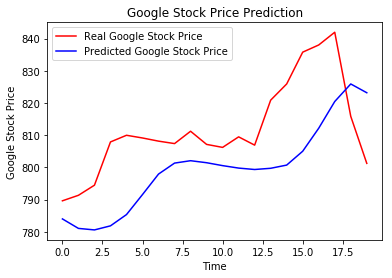

In [97]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
